Covid-19 : Web scraping and Analytics

In [259]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import re

url = ('https://www.worldometers.info/coronavirus/#countries')
url = requests.get(url)
print(url)

<Response [200]>


Extract data

In [260]:
html_info = bs(url.text,'html.parser')
table = html_info.find('table',{'id':'main_table_countries_today'})
#print(table)

In [261]:
header = []
for th in table.find_all('th'):
    header.append(th.text.strip())

print(header)

['#', 'Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot\xa0Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/\n1M pop', 'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop', 'Active Cases/1M pop']


In [262]:
rows = []
for tr in table.find_all('tr')[1:]:
    cols = tr.find_all('td')
    row = [elem.text.strip() for elem in cols]
    rows.append(row)

print(rows)

[['', 'North America', '131,889,132', '', '1,695,941', '', '127,665,129', '+350', '2,528,062', '6,095', '', '', '', '', '', 'North America', '', '', '', '', '', ''], ['', 'Asia', '221,500,265', '', '1,553,662', '', '205,673,091', '', '14,273,512', '14,733', '', '', '', '', '', 'Asia', '', '', '', '', '', ''], ['', 'Europe', '253,406,198', '', '2,101,824', '', '248,754,104', '+474', '2,550,270', '4,453', '', '', '', '', '', 'Europe', '', '', '', '', '', ''], ['', 'South America', '70,200,879', '', '1,367,332', '', '66,683,585', '', '2,149,962', '8,953', '', '', '', '', '', 'South America', '', '', '', '', '', ''], ['', 'Oceania', '14,895,771', '', '33,015', '', '14,752,388', '', '110,368', '31', '', '', '', '', '', 'Australia/Oceania', '', '', '', '', '', ''], ['', 'Africa', '12,860,924', '', '258,892', '', '12,090,808', '', '511,224', '529', '', '', '', '', '', 'Africa', '', '', '', '', '', ''], ['', '', '721', '', '15', '', '706', '', '0', '0', '', '', '', '', '', '', '', '', '', '', 

Transform

In [263]:
df = pd.DataFrame(rows, columns=header)
df.head(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,North America,"131,889,132",,"1,695,941",,"127,665,129",+350,"2,528,062","6,095",...,,,,North America,,,,,,
1,,Asia,"221,500,265",,"1,553,662",,"205,673,091",,"14,273,512","14,733",...,,,,Asia,,,,,,
2,,Europe,"253,406,198",,"2,101,824",,"248,754,104",+474,"2,550,270","4,453",...,,,,Europe,,,,,,
3,,South America,"70,200,879",,"1,367,332",,"66,683,585",,"2,149,962","8,953",...,,,,South America,,,,,,
4,,Oceania,"14,895,771",,"33,015",,"14,752,388",,"110,368",31,...,,,,Australia/Oceania,,,,,,
5,,Africa,"12,860,924",,"258,892",,"12,090,808",,"511,224",529,...,,,,Africa,,,,,,
6,,,721,,15,,706,,0,0,...,,,,,,,,,,
7,,World,"704,753,890",0,"7,010,681",0,"675,619,811",+790,"22,123,398","34,794",...,,,,All,,,,,,
8,1,USA,"111,820,082",,"1,219,487",,"109,814,428",,"786,167",940,...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0,,,"2,348"
9,2,India,"45,035,393",,"533,570",,N/A,N/A,N/A,N/A,...,"935,879,495","665,334","1,406,631,776",Asia,31,"2,636",2,,,0.4


In [264]:
df = df[df['#'] >= '1']
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
8,1,USA,"111,820,082",,"1,219,487",,"109,814,428",,"786,167",940,...,"1,186,851,502","3,544,901","334,805,269",North America,3,275,0,,,"2,348"
9,2,India,"45,035,393",,"533,570",,N/A,N/A,N/A,N/A,...,"935,879,495","665,334","1,406,631,776",Asia,31,"2,636",2,,,0.4
10,3,France,"40,138,560",,"167,642",,"39,970,918",,0,,...,"271,490,188","4,139,547","65,584,518",Europe,2,391,0,,,
11,4,Germany,"38,828,995",,"183,027",,"38,240,600",,"405,368",N/A,...,"122,332,384","1,458,359","83,883,596",Europe,2,458,1,,,"4,833"
12,5,Brazil,"38,743,918",,"711,380",,"36,249,161",,"1,783,377",N/A,...,"63,776,166","296,146","215,353,593",South America,6,303,3,,,"8,281"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,227,Tokelau,80,,,,,,80,,...,,,"1,378",Australia/Oceania,17,,,,,"58,055"
235,228,Vatican City,29,,,,29,,0,,...,,,799,Europe,28,,,,,
236,229,Western Sahara,10,,1,,9,,0,,...,,,"626,161",Africa,"62,616","626,161",,,,
237,230,MS Zaandam,9,,2,,7,,0,,...,,,,,,,,,,


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231 entries, 8 to 238
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    231 non-null    object
 1   Country,Other        231 non-null    object
 2   TotalCases           231 non-null    object
 3   NewCases             231 non-null    object
 4   TotalDeaths          231 non-null    object
 5   NewDeaths            231 non-null    object
 6   TotalRecovered       231 non-null    object
 7   NewRecovered         231 non-null    object
 8   ActiveCases          231 non-null    object
 9   Serious,Critical     231 non-null    object
 10  Tot Cases/1M pop     231 non-null    object
 11  Deaths/1M pop        231 non-null    object
 12  TotalTests           231 non-null    object
 13  Tests/
1M pop        231 non-null    object
 14  Population           231 non-null    object
 15  Continent            231 non-null    object
 16  1 Caseevery X

In [266]:
df.iloc[8:15,0:12]

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
16,9,UK,"24,910,387",,"232,112",,"24,678,275",,0,N/A,"363,666","3,389"
17,10,Russia,"24,124,215",,"402,756",,"23,545,818",,"175,641",N/A,"165,454","2,762"
18,11,Turkey,"17,232,066",,"102,174",,N/A,N/A,N/A,N/A,"201,399","1,194"
19,12,Spain,"13,914,811",,"121,760",,"13,762,417",,"30,634",231,"297,840","2,606"
20,13,Australia,"11,853,144",,"24,414",,"11,820,014",,"8,716",3,"454,687",937
21,14,Vietnam,"11,625,195",,"43,206",,"10,640,971",,"941,018",,"117,481",437
22,15,Taiwan,"10,241,523",,"19,005",,"10,222,518",,0,,"428,720",796


In [267]:
df.iloc[8:15,12:23]

,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
16,"522,526,476","7,628,357","68,497,907",Europe,3,295,0,,,
17,"273,400,000","1,875,095","145,805,947",Europe,6,362,1,,,"1,205"
18,"162,743,369","1,902,052","85,561,976",Asia,5,837,1,,,"4,024"
19,"471,036,328","10,082,298","46,719,142",Europe,3,384,0,,,656
20,"81,916,639","3,142,326","26,068,792",Australia/Oceania,2,"1,068",0,,,334
21,"85,826,548","867,342","98,953,541",Asia,9,"2,290",1,,,"9,510"
22,"30,742,304","1,286,903","23,888,595",Asia,2,"1,257",1,,,


In [268]:
select_col = ['Country,Other','TotalCases','TotalDeaths','TotalRecovered','Population','Continent']
covid = df[select_col].rename(columns={'Country,Other':'Country'})
covid

,Country,TotalCases,TotalDeaths,TotalRecovered,Population,Continent
8,USA,"111,820,082","1,219,487","109,814,428","334,805,269",North America
9,India,"45,035,393","533,570",N/A,"1,406,631,776",Asia
10,France,"40,138,560","167,642","39,970,918","65,584,518",Europe
11,Germany,"38,828,995","183,027","38,240,600","83,883,596",Europe
12,Brazil,"38,743,918","711,380","36,249,161","215,353,593",South America
...,...,...,...,...,...,...
234,Tokelau,80,,,"1,378",Australia/Oceania
235,Vatican City,29,,29,799,Europe
236,Western Sahara,10,1,9,"626,161",Africa
237,MS Zaandam,9,2,7,,


In [269]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231 entries, 8 to 238
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country         231 non-null    object
 1   TotalCases      231 non-null    object
 2   TotalDeaths     231 non-null    object
 3   TotalRecovered  231 non-null    object
 4   Population      231 non-null    object
 5   Continent       231 non-null    object
dtypes: object(6)
memory usage: 12.6+ KB


In [270]:
covid[covid == 'N/A'].count()

Country            0
TotalCases         0
TotalDeaths        0
TotalRecovered    47
Population         0
Continent          0
dtype: int64

In [271]:
covid[covid == ''].count()

Country           0
TotalCases        0
TotalDeaths       5
TotalRecovered    1
Population        2
Continent         2
dtype: int64

In [272]:
covid['TotalCases'] = covid['TotalCases'].replace({',':''}, regex=True)
covid['TotalCases'] = pd.to_numeric(covid['TotalCases'], errors='coerce')
covid['TotalCases'] = covid['TotalCases'].fillna(0).astype(int)

covid['TotalDeaths'] = covid['TotalDeaths'].replace({',':''}, regex=True)
covid['TotalDeaths'] = pd.to_numeric(covid['TotalDeaths'], errors='coerce')
covid['TotalDeaths'] = covid['TotalDeaths'].fillna(0).astype(int)

covid['TotalRecovered'] = covid['TotalRecovered'].replace({'N/A':'' , ',':''}, regex=True)
covid['TotalRecovered'] = pd.to_numeric(covid['TotalRecovered'], errors='coerce')
covid['TotalRecovered'] = covid['TotalRecovered'].fillna(0).astype(int)

covid['Population'] = covid['Population'].replace({',':''}, regex=True)
covid['Population'] = pd.to_numeric(covid['Population'], errors='coerce')
covid['Population'] = covid['Population'].fillna(0).astype(int)

covid['Continent'] = covid['Continent'].replace({'':'etc'}, regex=True)

In [273]:
covid[covid == 'N/A'].count()

Country           0
TotalCases        0
TotalDeaths       0
TotalRecovered    0
Population        0
Continent         0
dtype: int64

In [274]:
covid[covid == ''].count()

Country           0
TotalCases        0
TotalDeaths       0
TotalRecovered    0
Population        0
Continent         0
dtype: int64

In [275]:
covid['infect_percentage'] = (covid['TotalCases']/covid['Population']) * 100
covid['death_percentage'] = (covid['TotalDeaths']/covid['TotalCases']) * 100
covid = covid.round(2)
covid.head()

,Country,TotalCases,TotalDeaths,TotalRecovered,Population,Continent,infect_percentage,death_percentage
8,USA,111820082,1219487,109814428,334805269,North America,33.40,1.09
9,India,45035393,533570,0,1406631776,Asia,3.20,1.18
10,France,40138560,167642,39970918,65584518,Europe,61.20,0.42
11,Germany,38828995,183027,38240600,83883596,Europe,46.29,0.47
12,Brazil,38743918,711380,36249161,215353593,South America,17.99,1.84


In [276]:
covid[covid['Population'] == 0]

,Country,TotalCases,TotalDeaths,TotalRecovered,Population,Continent,infect_percentage,death_percentage
233,Diamond Princess,712,13,699,0,etc,inf,1.83
237,MS Zaandam,9,2,7,0,etc,inf,22.22


In [277]:
covid.drop(covid[covid['Population'] == 0].index, inplace=True)
covid[covid['Population'] == 0].count()

Country              0
TotalCases           0
TotalDeaths          0
TotalRecovered       0
Population           0
Continent            0
infect_percentage    0
death_percentage     0
dtype: int64

! This infect_percentage and death_percentage might be bias, because of many various of ...
1. each Continent have different 'amount Country collection'
2. each Country or Continent have 'different Population' 

In [278]:
total_per_continent = covid.groupby('Continent').sum()
total_per_continent.head(2)

,Country,TotalCases,TotalDeaths,TotalRecovered,Population,infect_percentage,death_percentage
Continent,,,,,,,
Africa,South AfricaMoroccoTunisiaEgyptLibyaEthiopiaRé...,12860924,258892,9211514,1406728744,251.04,110.49
Asia,IndiaS. KoreaJapanTurkeyVietnamTaiwanIranIndon...,221500265,1553662,108524029,4711356783,823.17,68.00


In [279]:
total_per_continent = total_per_continent.drop(columns='Country',axis=1)
total_per_continent['infect_percentage'] = (total_per_continent['TotalCases']/total_per_continent['Population']) * 100
total_per_continent['death_percentage'] = (total_per_continent['TotalDeaths']/total_per_continent['TotalCases']) * 100
total_per_continent['Total_Country'] = covid.groupby('Continent').size()
total_per_continent = total_per_continent.round(2)
total_per_continent.head()

,TotalCases,TotalDeaths,TotalRecovered,Population,infect_percentage,death_percentage,Total_Country
Continent,,,,,,,
Africa,12860924,258892,9211514,1406728744,0.91,2.01,58
Asia,221500265,1553662,108524029,4711356783,4.70,0.70,50
Australia/Oceania,14895771,33015,14615509,43470408,34.27,0.22,20
Europe,253406198,2101824,235797174,747543837,33.90,0.83,48
North America,131889132,1695941,126483239,598140916,22.05,1.29,39


Load

In [280]:
covid.to_csv('covid_per_country.csv', sep=';', index=False)
total_per_continent.to_csv('covid_per_continent.csv', sep=';')

Visualization

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns


In [282]:
covid.info(), total_per_continent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 8 to 238
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            229 non-null    object 
 1   TotalCases         229 non-null    int64  
 2   TotalDeaths        229 non-null    int64  
 3   TotalRecovered     229 non-null    int64  
 4   Population         229 non-null    int64  
 5   Continent          229 non-null    object 
 6   infect_percentage  229 non-null    float64
 7   death_percentage   229 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 16.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Africa to South America
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TotalCases         6 non-null      int64  
 1   TotalDeaths        6 non-null      int64  
 2   TotalRecovered     6 non-null      int64  
 3   P

(None, None)

In [283]:
covid_tf = covid.groupby('Continent').agg({
    'TotalCases':'sum',
    'TotalDeaths':'sum',
    'TotalRecovered':'sum',
    'Population':'sum',
    'infect_percentage':'mean',
    'death_percentage':'mean'
}).reset_index()
covid_tf = covid_tf.round(2)
covid_tf

,Continent,TotalCases,TotalDeaths,TotalRecovered,Population,infect_percentage,death_percentage
0,Africa,12860924,258892,9211514,1406728744,4.33,1.90
1,Asia,221500265,1553662,108524029,4711356783,16.46,1.36
2,Australia/Oceania,14895771,33015,14615509,43470408,25.02,0.34
3,Europe,253406198,2101824,235797174,747543837,40.00,0.92
4,North America,131889132,1695941,126483239,598140916,22.85,1.08
5,South America,70200879,1367332,65935495,437694443,18.72,1.77


In [284]:
covid_tf.sort_values(by='Population',ascending=False)

,Continent,TotalCases,TotalDeaths,TotalRecovered,Population,infect_percentage,death_percentage
1,Asia,221500265,1553662,108524029,4711356783,16.46,1.36
0,Africa,12860924,258892,9211514,1406728744,4.33,1.90
3,Europe,253406198,2101824,235797174,747543837,40.00,0.92
4,North America,131889132,1695941,126483239,598140916,22.85,1.08
5,South America,70200879,1367332,65935495,437694443,18.72,1.77
2,Australia/Oceania,14895771,33015,14615509,43470408,25.02,0.34


C:\Users\User\AppData\Local\Temp\ipykernel_19220\4278961169.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=covid_tf,x='Continent',y='TotalCases',


Text(0, 0.5, 'Total Cases')

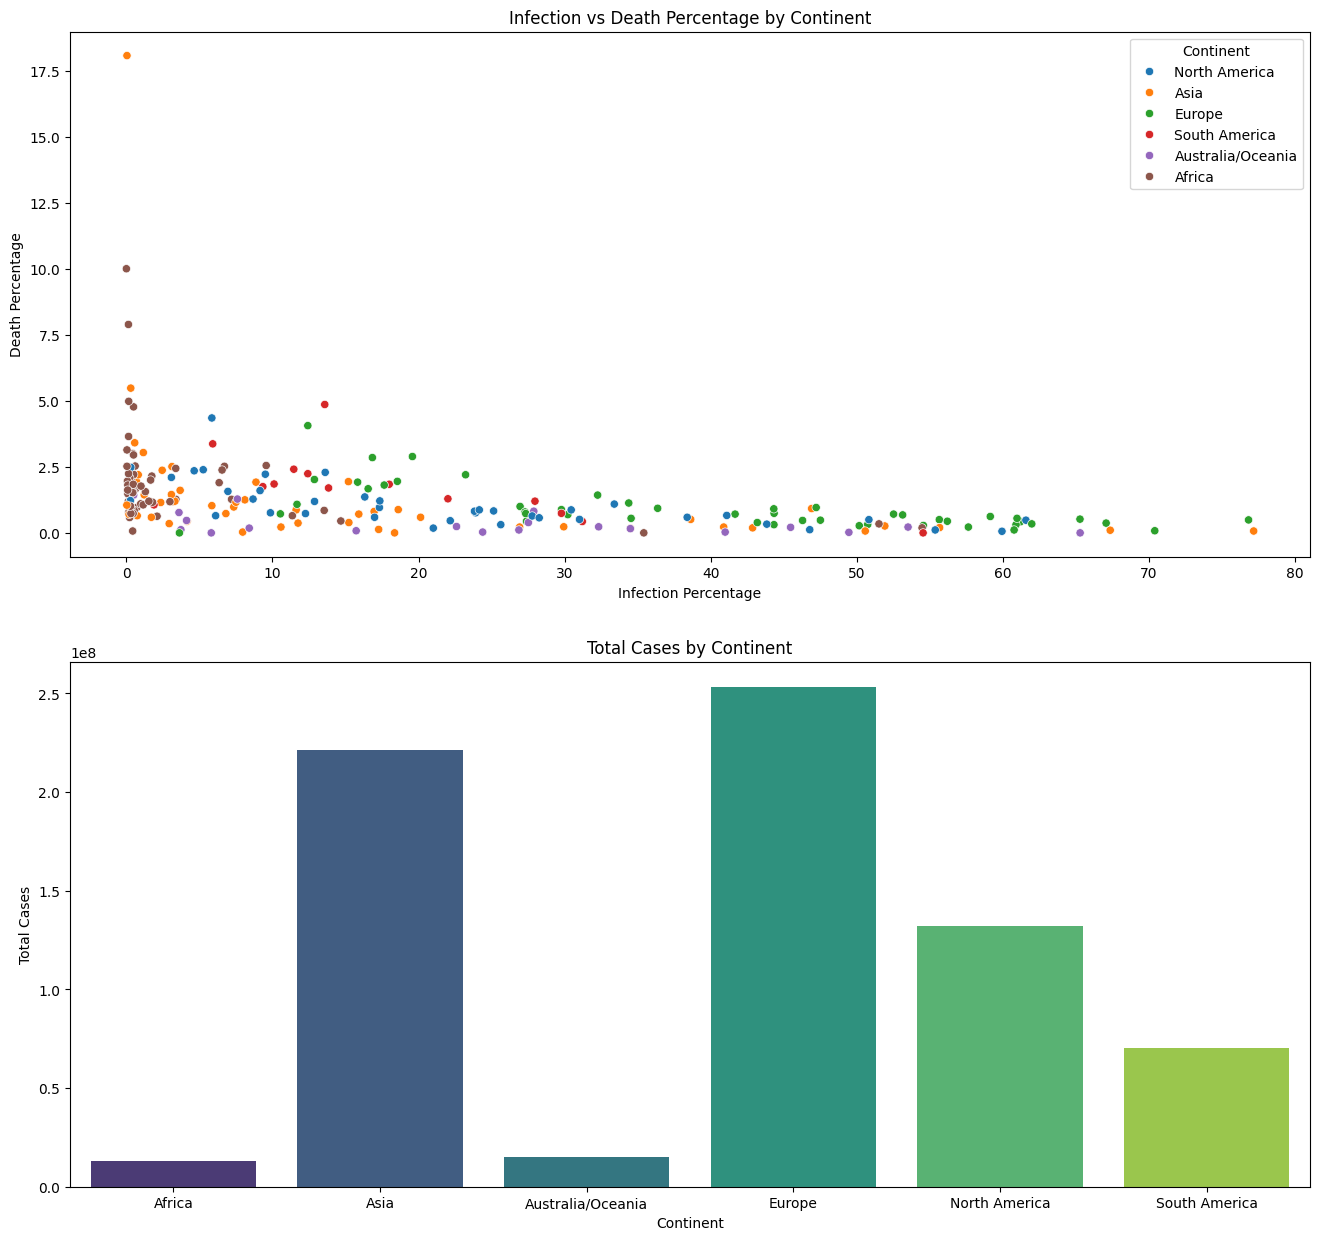

In [285]:
fig, axes = plt.subplots(2,1, figsize=(16,15))
sns.scatterplot(data=covid,x='infect_percentage',y='death_percentage',
                hue='Continent', ax=axes[0])
axes[0].set_title('Infection vs Death Percentage by Continent')
axes[0].set_xlabel('Infection Percentage')
axes[0].set_ylabel('Death Percentage')

sns.barplot(data=covid_tf,x='Continent',y='TotalCases',
                palette='viridis', ax=axes[1])
axes[1].set_title('Total Cases by Continent')
axes[1].set_xlabel('Continent')
axes[1].set_ylabel('Total Cases')

? Low percentage of infection but still have high death percentage
-   some Country is have a low connection between (Low infection% (near 0%)), but no vaccine or medicine to cure (high death%)

? Europe have population lower than Asia and Africa but have more cases than both
-   might be the culture of the Europe have relation and skinship than both
-   in case Africa have low infomation about covid case because healthcare cann't reach to all of people